# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
# Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

## Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

n_train = np.shape(train['features'])[0]
n_valid = np.shape(valid['features'])[0]
n_test = np.shape(test['features'])[0]

# This is the shape of the 87th traffic sign of the training data set.  The shape obviously vaires throughout the data set.

# TODO: How many unique classes/labels there are in the dataset.
label_array = np.unique(train['labels'])
#print("Array of unique label-ids:", label_array)
label_bin = np.bincount(train['labels'])
#print("Label bin:", label_bin)

n_classes = len(train['labels'])
# Not really.  Count the number of 'different' ids!


print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)


print("\nShape of an image=", valid['features'][4000].shape) # Note: 4000 is a totally arbitrary integer
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630

Shape of an image= (32, 32, 3)
Number of classes = 34799


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

[  180.  1980.  2010.  1260.  1770.  1650.   360.  1290.  1260.  1320.
  1800.  1170.  1890.  1920.   690.   540.   360.   990.  1080.   180.
   300.   270.   330.   450.   240.  1350.   540.   210.   480.   240.
   390.   690.   210.   599.   360.  1080.   330.   180.  1860.   270.
   300.   210.   210.]


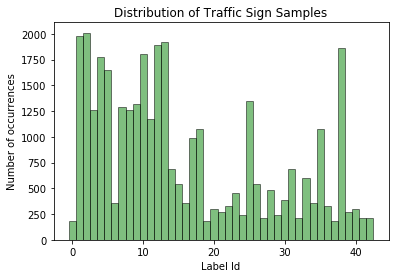

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#(counts, bins, patches) = plt.hist(train['labels'], 42, rwidth=1, facecolor='green', edgecolor='black', alpha=0.5) # linewidth=??
(counts, bins, patches) = plt.hist(train['labels'], np.arange(-0.5,43.5,1), rwidth=1, facecolor='green', edgecolor='black', alpha=0.5)

print(counts)

plt.title('Distribution of Traffic Sign Samples')
plt.xlabel('Label Id')
plt.ylabel('Number of occurrences')
plt.show()

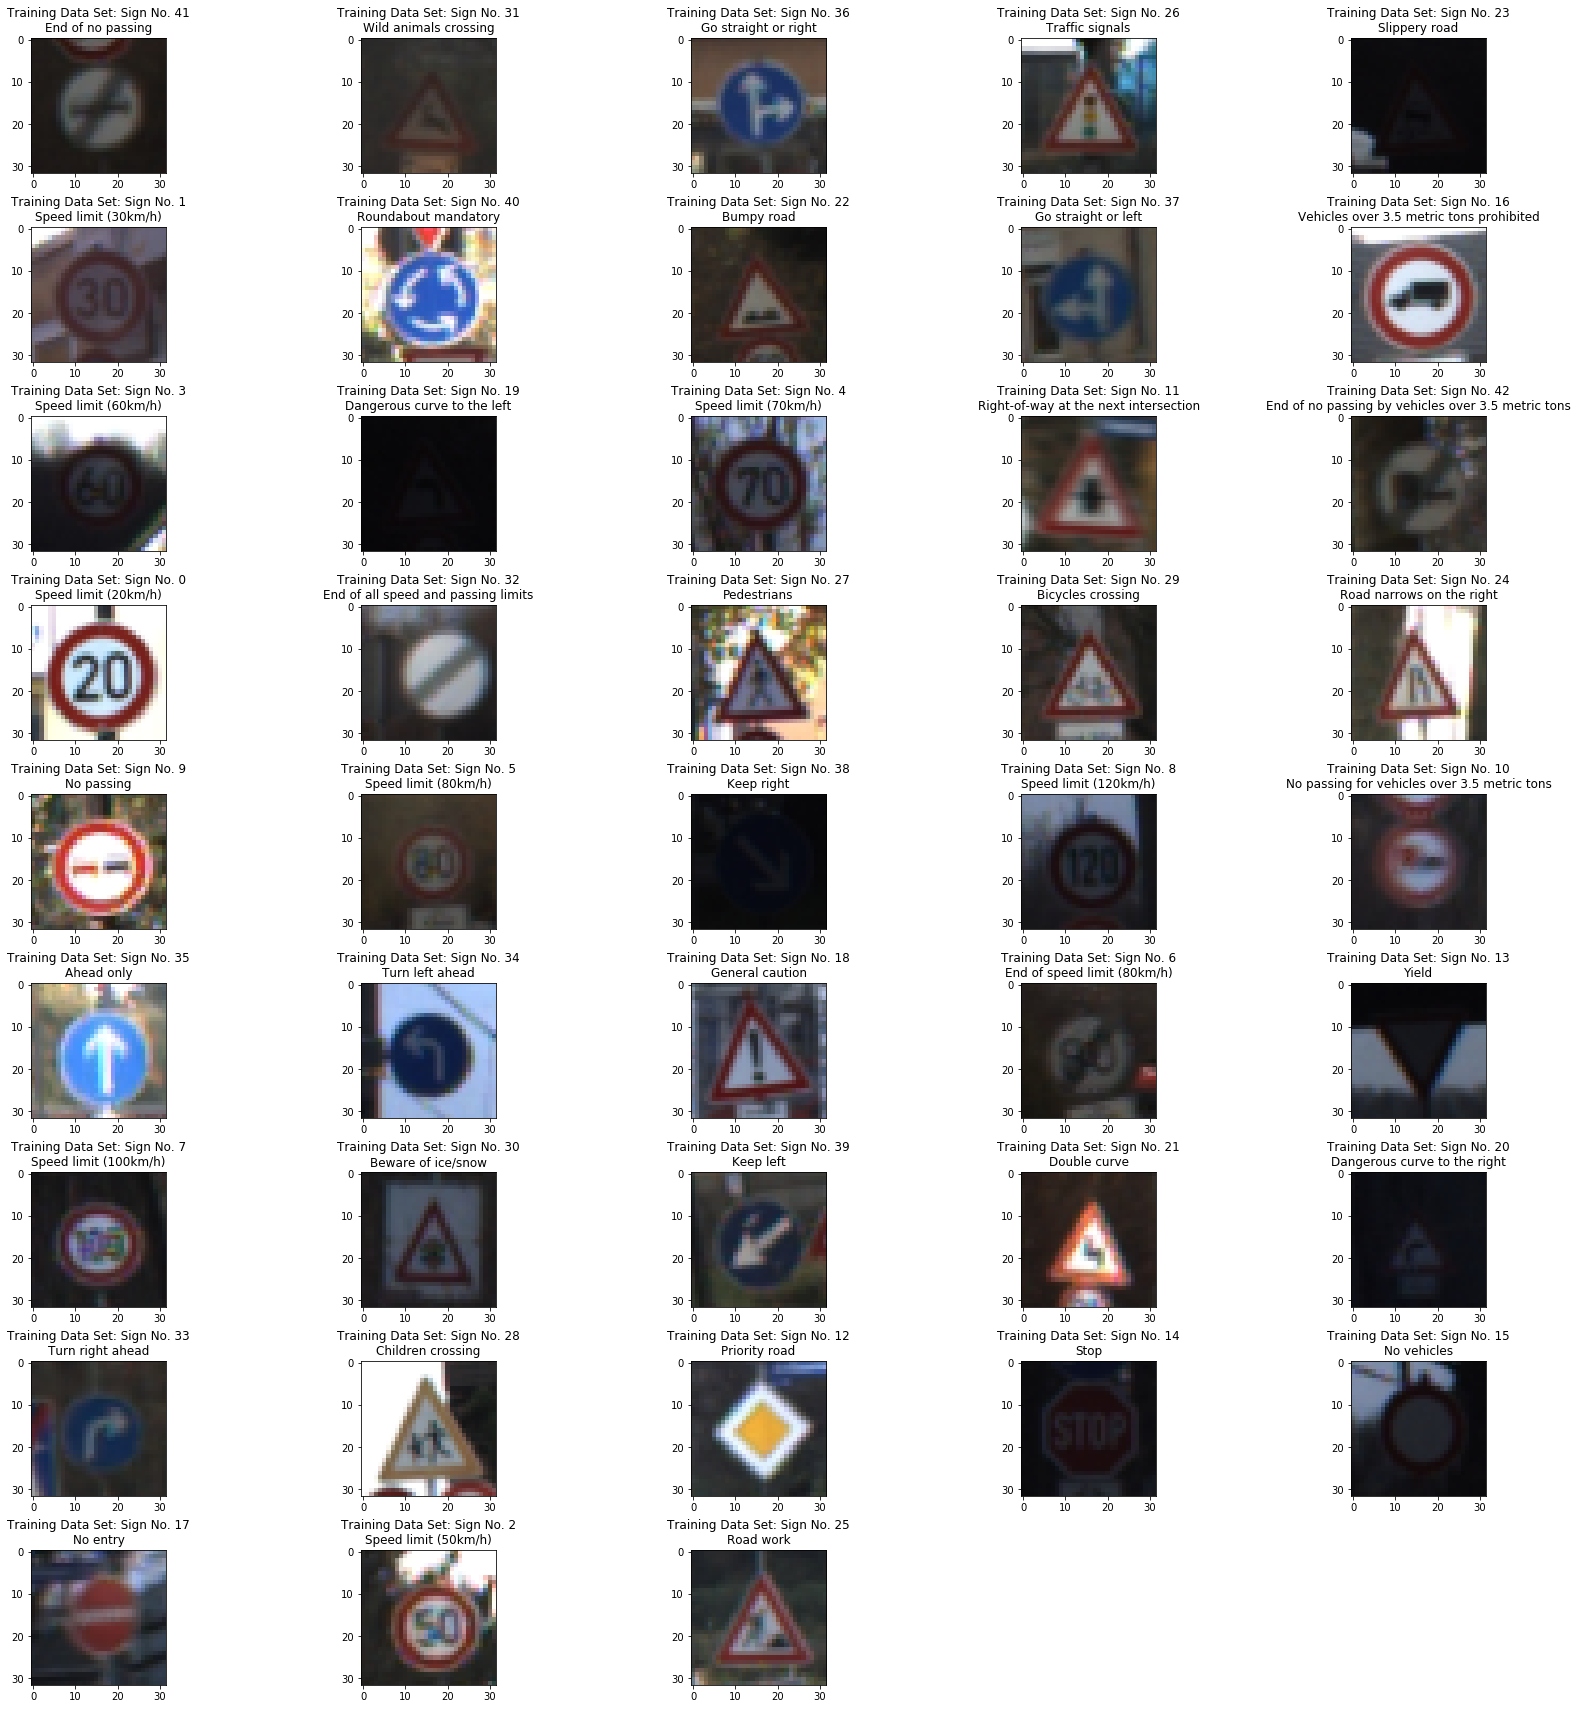

In [5]:
# Let's try to show a pictures of each sign first.  A representation of some sort.
import csv

signNames = {}

with open('./signnames.csv', 'r') as csvHandle:
    next(csvHandle)
    csvContent = csv.reader(csvHandle, delimiter=',')
    for row in csvContent:
        #print(row[0], row[1])
        signNames[row[0]] = row[1]
        
        

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (15, 15)
        
# index can be varied by choosing low integers in order 
# to find appropriate features in case some pics are too dark
index = 10

for i in range(43):
    signId = train['labels'][index]
    fig = plt.subplot(10,5,i+1)
    fig = train['features'][index]
    plt.title('Training Data Set: Sign No. ' + str(signId) + '\n' + signNames[str(signId)])
    plt.subplots_adjust(left=-0.3, right=1.2, top=1.5, bottom=-0.2, hspace=0.4, wspace=0.1)
    plt.imshow(fig)
    index = index + int(counts[signId])
    

# Complete the list of plots for all 43 traffic signs

----

# Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [27]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.


#print(X_train.shape)
print("Starting conversion of training set...")
X_train_gray_tmp = np.dot(X_train, [0.2989, 0.5870, 0.1140])
X_train_gray = np.divide(X_train_gray_tmp[:], 255.)
X_train_gray = X_train_gray.reshape(-1, 32, 32, 1)
print("...finished conversion of training set.\n")

#print("Shape of new, rescaled array: {}".format(X_train_gray.shape))
#print("Example of one pixel color value: {}\n".format(X_train_tmp[32,31,4]))


# RGB-to-Grayscale conversion for the validation data
print("Starting conversion of validation set...")
X_valid_gray = np.dot(X_valid, [0.2989, 0.5870, 0.1140])
X_valid_gray = np.divide(X_valid_gray[:], 255.)
X_valid_gray = X_valid_gray.reshape(-1, 32, 32, 1)
print("...finished conversion of validation set.\n")


Starting conversion of training set...
...finished conversion of training set.

Starting conversion of validation set...
...finished conversion of validation set.



## Model Architecture

Proposed model is one with 6 weight layers.  These are:

- conv3-64
- maxpool
- conv3-128
- maxpool
- conv3-512
- maxpool
- FC-4096
- FC-4096
- FC-n_classes
- softmax

# Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [5]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())
#print(device_lib.list_local_devices())

['/gpu:0']


In [6]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_X, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_X, y: batch_y})
        total_accuracy += (accuracy*len(batch_X))

    return total_accuracy / num_examples
     

## Define the network/graph:

In [7]:
import tensorflow as tf

rate = 0.001

mu = 0.0
sigma = 0.1

#######################################
# Definition of the computational graph
#######################################
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(dtype=tf.float32, shape=(None, 32, 32, 1))
    y = tf.placeholder(dtype=tf.int32, shape=(None))
    one_hot_y = tf.one_hot(y, 43)
    

    conv1_W = tf.Variable(tf.truncated_normal(shape=(3,3,1,64), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1 = tf.nn.conv2d(X, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID') 

    conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,64,128), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
   
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3,3,128,512), mean=mu, stddev=sigma))                
    conv3_b = tf.Variable(tf.zeros(512))
    conv3 = tf.nn.conv2d(conv2,conv3_W, strides=[1,1,1,1], padding='VALID') + conv3_b                 
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
  
    fc0 = tf.contrib.layers.flatten(conv3)
 
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048,2048), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1 = tf.matmul(fc0,fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
 
    fc2_W = tf.Variable(tf.truncated_normal(shape=(2048,2048), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(2048))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)

    fc3_W = tf.Variable(tf.truncated_normal(shape=(2048,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2,fc3_W) + fc3_b  

        
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc3, labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
#######################################

## Train a 'fresh' network:

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


assert(len(X_train_gray)==len(y_train))
assert(len(X_valid_gray)==len(y_valid))




EPOCHS = 5
BATCH_SIZE = 128

correct_prediction = tf.equal(tf.argmax(fc3, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
       
from sklearn.utils import shuffle
X_train_gray, y_train = shuffle(X_train_gray, y_train)



#with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:

with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())

    print("Start training...")
    for i in range(EPOCHS):
        counter = 0

        for offset in range(0, n_train, BATCH_SIZE):
            batch_X, batch_y = X_train_gray[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            
            print("Epoch No.: {}, Batch No.: {}".format(i, counter), end='\r')
            sess.run(training_operation, feed_dict={X: batch_X, y: batch_y})
            counter += 1
    
        validation_accuracy = evaluate(X_valid_gray, y_valid)
        print("Epoch No.: {}".format(i))
        print("Validation accuracy is {} \n".format(validation_accuracy))

    tf.train.Saver().save(sess, './model')
    print("Session saved!")


Start training...
Epoch No.: 0, Batch No.: 271
Validation accuracy is 0.848299319998207 

Epoch No.: 1, Batch No.: 271
Validation accuracy is 0.8870748299590043 

Epoch No.: 2, Batch No.: 271
Validation accuracy is 0.8925170063431841 

Epoch No.: 3, Batch No.: 271
Validation accuracy is 0.9170068022885831 

Epoch No.: 4, Batch No.: 271
Validation accuracy is 0.910204080983895 

Session saved!


## Restore a network and train it again:

In [48]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

"""
Reminder from above:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
"""


assert(len(X_train_gray)==len(y_train))
assert(len(X_valid_gray)==len(y_valid))



correct_prediction = tf.equal(tf.argmax(fc3,1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

EPOCHS = 20
BATCH_SIZE = 128
      
from sklearn.utils import shuffle
X_train_gray, y_train = shuffle(X_train_gray, y_train)


#with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:

with tf.Session(graph=g) as sess:
    #Load variables here:
    tf.train.Saver().restore(sess, './model')
    
    print("Start training...")
    for i in range(EPOCHS):
        counter = 0

        for offset in range(0, n_train, BATCH_SIZE):
            batch_X, batch_y = X_train_gray[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            
            print("Epoch No.: {}, Batch No.: {}".format(i, counter), end='\r')
            sess.run(training_operation, feed_dict={X: batch_X, y: batch_y})
            counter += 1
    
        validation_accuracy = evaluate(X_valid_gray, y_valid)
        print("Epoch No.: {}".format(i))
        print("Validation accuracy is {} \n".format(validation_accuracy))

    tf.train.Saver().save(sess, './model')

    print("Session saved!")


Start training...
Epoch No.: 0, Batch No.: 271
Validation accuracy is 0.9077097507290829 

Epoch No.: 1, Batch No.: 271
Validation accuracy is 0.9038548751212572 

Epoch No.: 2, Batch No.: 271
Validation accuracy is 0.9217687076181511 

Epoch No.: 3, Batch No.: 271
Validation accuracy is 0.9258503398927701 

Epoch No.: 4, Batch No.: 271
Validation accuracy is 0.9319727891697094 

Epoch No.: 5, Batch No.: 271
Validation accuracy is 0.9473922905197489 

Epoch No.: 6, Batch No.: 271
Validation accuracy is 0.9387755102311132 

Epoch No.: 7, Batch No.: 271
Validation accuracy is 0.9183673467225228 

Epoch No.: 8, Batch No.: 271
Validation accuracy is 0.9399092961871435 

Epoch No.: 9, Batch No.: 271
Validation accuracy is 0.927664398606402 

Epoch No.: 10, Batch No.: 271
Validation accuracy is 0.9394557820966725 

Epoch No.: 11, Batch No.: 271
Validation accuracy is 0.9464852610412909 

Epoch No.: 12, Batch No.: 271
Validation accuracy is 0.9356009068943205 

Epoch No.: 13, Batch No.: 271
V

## Test the Model

In [18]:
# RGB-to-Grayscale conversion for the testing data
print("Starting conversion of testing set...")
X_test_gray = np.dot(X_test, [0.2989, 0.5870, 0.1140])
X_test_gray = np.divide(X_test_gray[:], 255.)
X_test_gray = X_test_gray.reshape(-1, 32, 32, 1)
print("...finished conversion of testing set.\n")

Starting conversion of testing set...
...finished conversion of testing set.



In [30]:
BATCH_SIZE = 128

assert(len(X_test_gray)==len(y_test))

correct_prediction = tf.equal(tf.argmax(fc3,1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session(graph=g) as sess:
    tf.train.Saver().restore(sess, './model')   
    testing_accuracy = evaluate(X_test_gray, y_test)
    print("The testing accuracy is: {}".format(testing_accuracy))
    training_accuracy = evaluate(X_train_gray, y_train)
    print("The accuracy on the training set is: {}".format(training_accuracy))
    validation_accuracy = evaluate(X_valid_gray, y_valid)
    print("The accuracy on the validation set is: {}".format(validation_accuracy))

The testing accuracy is: 0.9502771181146586
The accuracy on the training set is: 1.0
The accuracy on the validation set is: 0.9621315195446922


---

# Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

As a citizen of Nuremberg, Bavaria, I took the freedom to take my own pictures of traffic signs!

In [12]:
imgList = [ './images/IMG_2616_detail.JPG',
            './images/IMG_2621_detail.JPG',
            './images/IMG_2625_detail.JPG',
            './images/IMG_2627_detail_above.JPG',
            './images/IMG_2627_detail_below.JPG',
            './images/IMG_2628_detail.JPG']

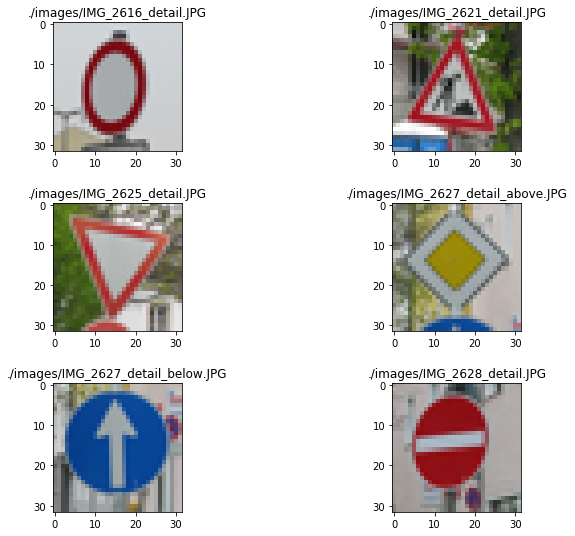

In [13]:
from PIL import Image
import matplotlib.image as mpimg

img = []

#handle = mpimg.imread('./images/IMG_2625_detail.JPG')
#handle = Image.open('./images/IMG_2625_detail.JPG')
for index, imgFile in enumerate(imgList):
    img.append(plt.subplot(3, 2, index+1))
    img[index] = Image.open(imgFile)
    img[index].thumbnail((32,32))
    plt.title(imgFile)
    plt.subplots_adjust(left=-0.3, right=1.2, top=1.5, bottom=-0.2, hspace=0.4, wspace=0.1)
    plt.imshow(img[index])
    


### Predict the Sign Type for Each Image

In [14]:
img_gray = []

for index, imgItem in enumerate(img):
    img_gray.append( np.array(imgItem) )
    img_gray[index] = np.dot(img_gray[index], [0.2989, 0.5870, 0.1140])
    img_gray[index] = np.divide(img_gray[index], 255.)

img_gray = np.array(img_gray)
img_gray = img_gray.reshape(-1, 32, 32, 1)


The actual predictions:

In [15]:
with tf.Session(graph = g) as sess:
    tf.train.Saver().restore(sess,'./model')
    top_k = tf.nn.top_k(sess.run(fc3, feed_dict={X: img_gray}), k=5, sorted=True)

    print(sess.run(top_k))

TopKV2(values=array([[ 38.99255371,  14.78109932,  14.52578735,  12.11439037,
         10.82343388],
       [ 34.99552155,  28.1674366 ,  20.65629578,  15.84359741,  13.4466238 ],
       [ 62.25167847,  18.97683907,  15.95740891,  14.6973381 ,
         13.42238426],
       [ 46.47083664,  16.14358902,  11.01332283,   9.49594402,   7.1618433 ],
       [ 50.21459961,  15.12154102,  14.83101559,  13.82695484,
          9.85185719],
       [ 38.39063263,  21.14825249,  19.87792969,  19.27081871,
         12.55334663]], dtype=float32), indices=array([[15, 34, 22, 12, 13],
       [25, 23, 29, 24, 22],
       [13, 35, 36, 12, 33],
       [12,  2, 40, 13, 38],
       [35, 34, 13, 36, 40],
       [17, 40, 14, 33,  7]], dtype=int32))


### Analyze Performance

Amazingly, the model predicted all six signs correctly. **(More on this in the writeup!)**

# Step 4: Visualize the Neural Network's State with Test Images

In [4]:
#pylab.rcParams['figure.figsize'] = (50, 50)

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    activation = tf_activation.eval(session=sess,feed_dict={X : image_input})
    featuremaps = activation.shape[3]
    
    plt.figure(plt_num)
    
    for featuremap in range(featuremaps):
        plt.subplot(20,6, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.tight_layout()
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

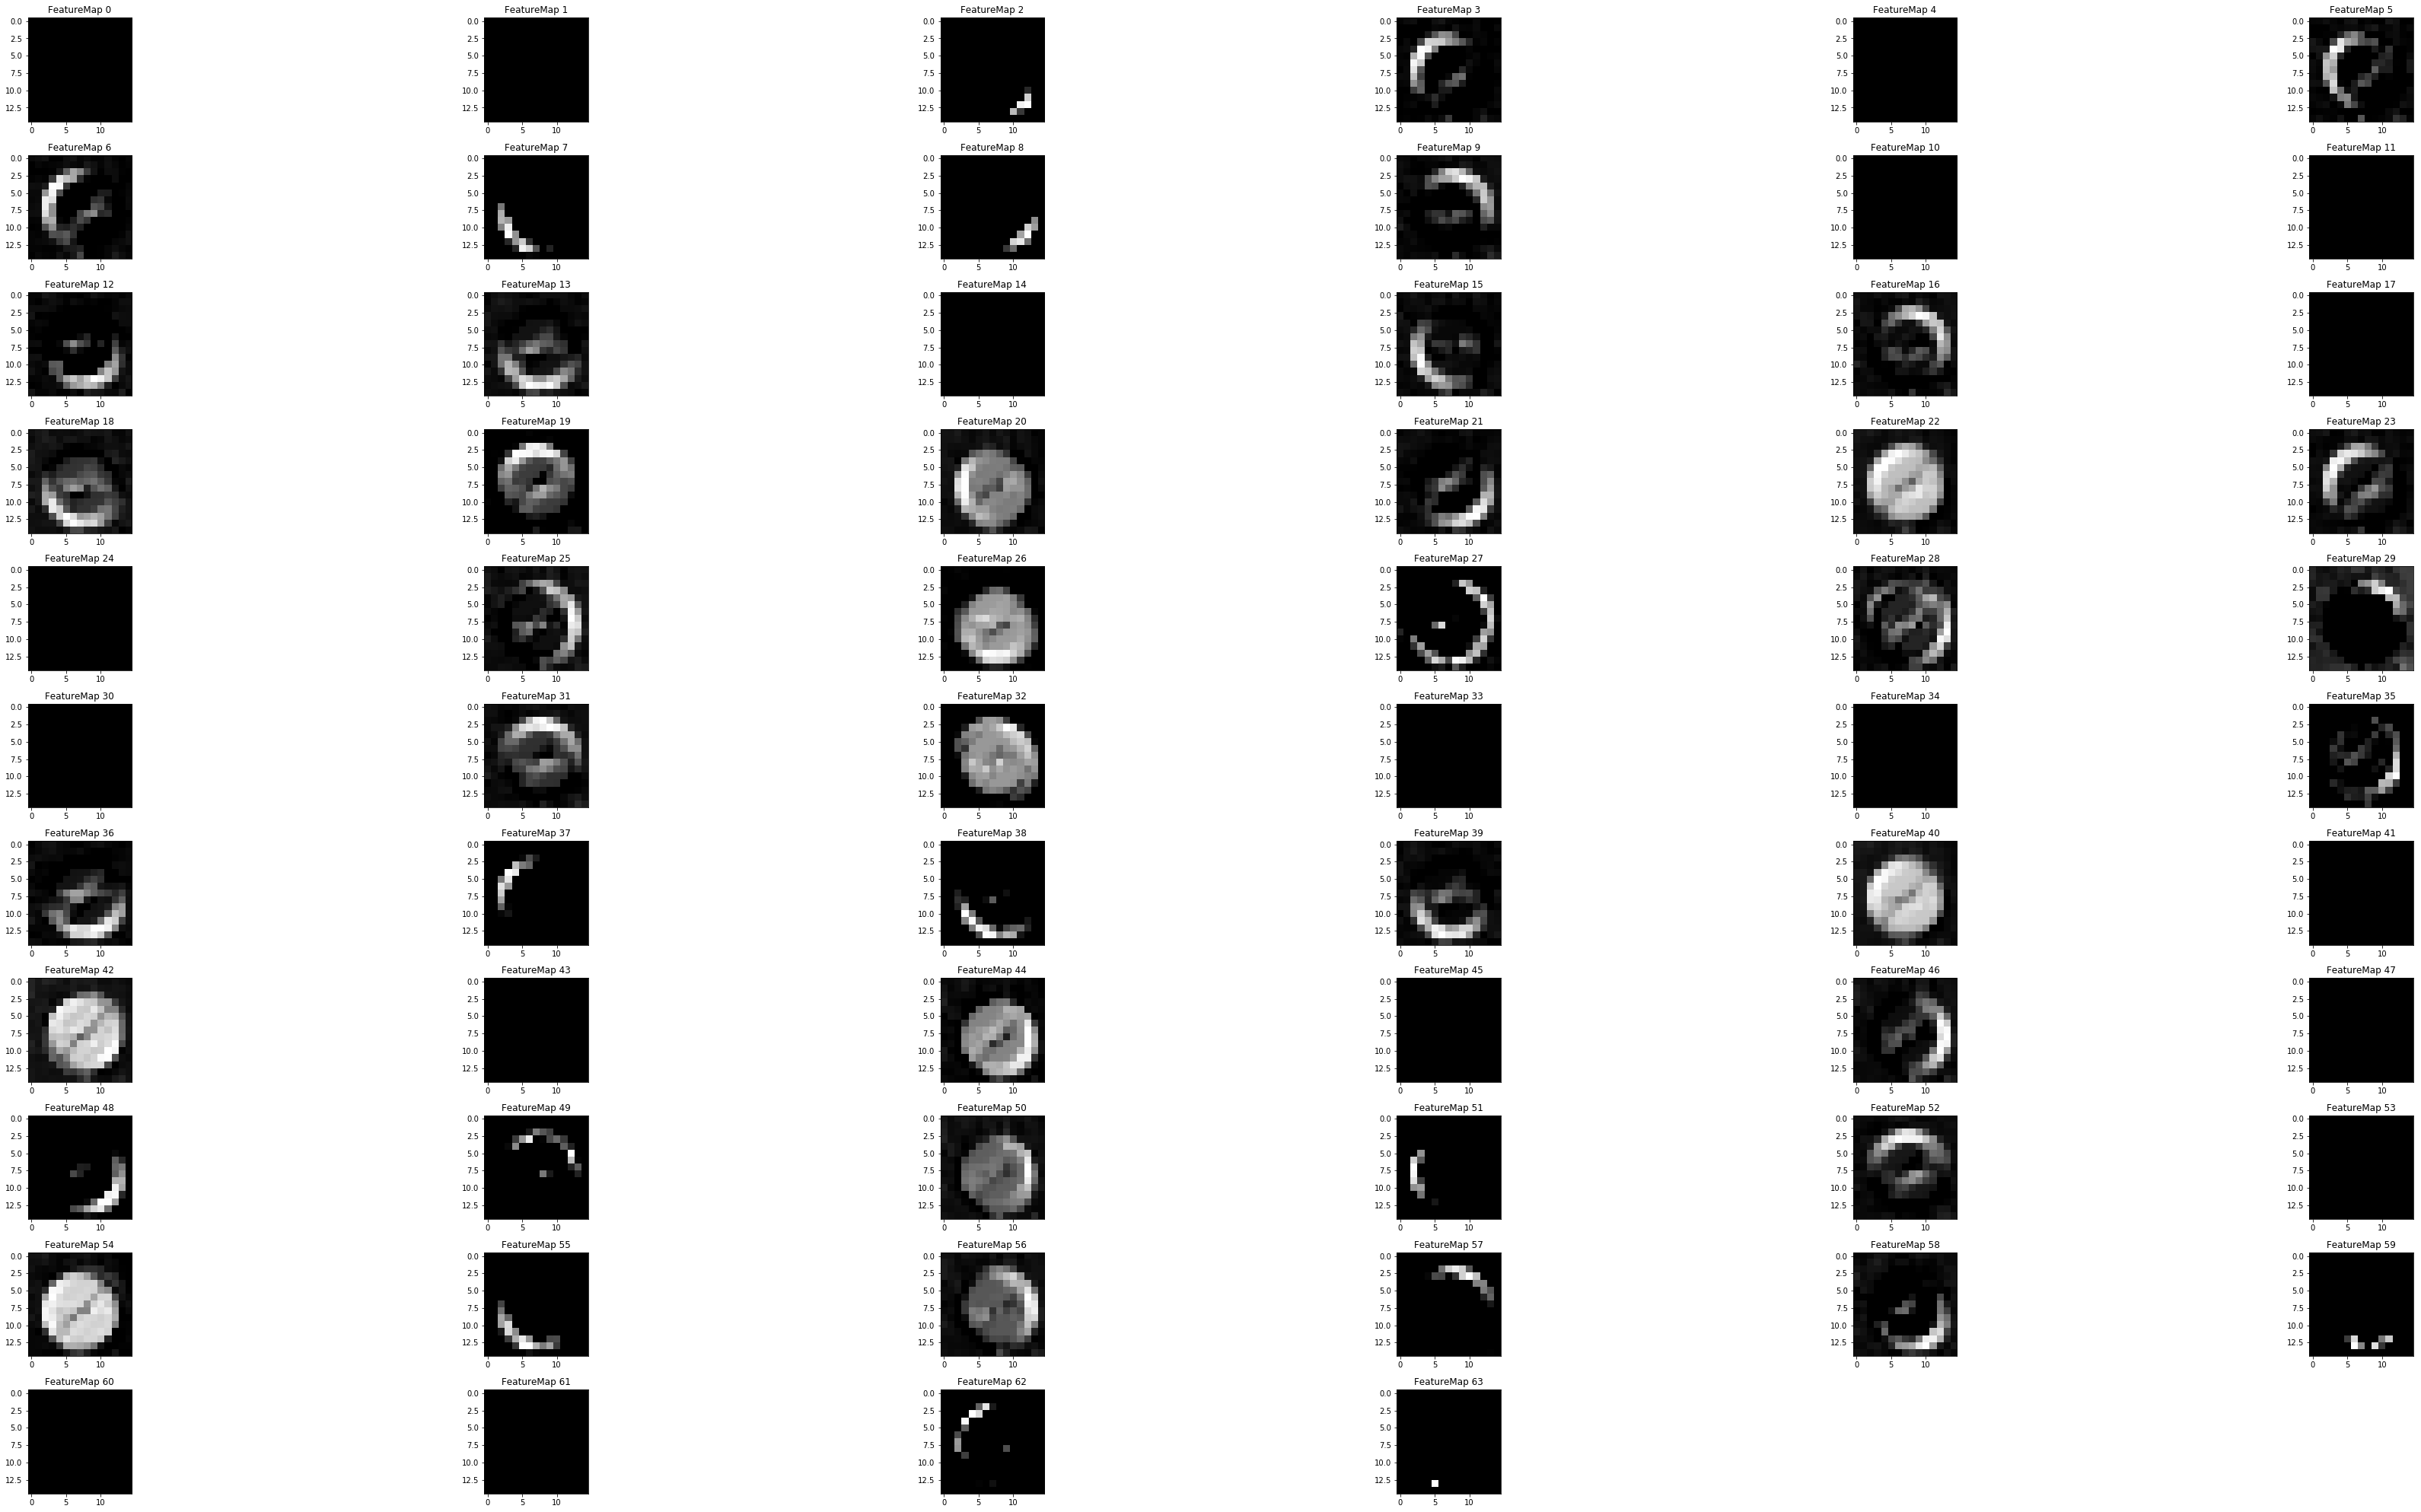

In [47]:
image = X_train_gray[154]

with tf.Session(graph=g) as sess:
    tf.train.Saver().restore(sess, './model')
    outputFeatureMap(image.reshape(-1,32,32,1), conv1, activation_min=-1, activation_max=-1, plt_num=1)



### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** The convolutional layers of the neural network act like a whole arrangement of different filters, similar to a Canny edge filter, but, for example, with different angles and threshold for the gradients.  In addition, the weights within a convoluted layer are constrained, such that each filter can act homogeneously over the whole image.